In [2]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

p2_nodes
(10, 64, 1, 64)
(10, 65, 65)


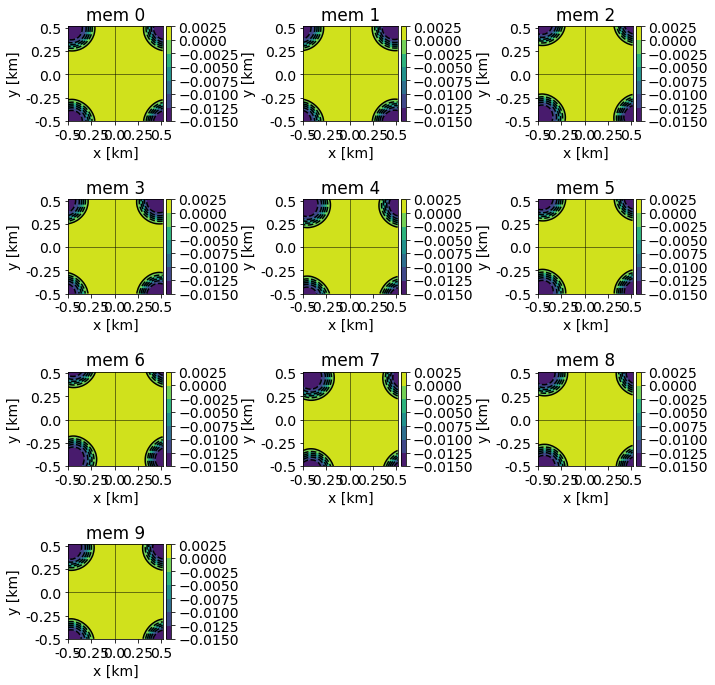

In [37]:
swe = True

attribute = 'p2_nodes'
# attribute = 'rhou'
et = 3.0
print(attribute)

base_fn = "output_swe_vortex"
directory = "output_swe_vortex"
py_directory = "../%s/" %directory

Nx, Ny, Nz = 64, 1, 64
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)

# base_fn = "output_travelling_vortex"
# directory = "output_travelling_vortex"
# py_directory = "../%s/" %directory

# Nx, Ny = 64, 64
# euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

times = [1.5]
l_typ = 'TIME'
# times = [0]
# l_typ = 'WINDOW_STEP'
# times = [0]
tags = tc.get_tag_dict()
tag = 'ic' if times[0] == 0.0 else tags[9]
# tag = 'full_split_2'
# tag = tags[7]
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

eN = 1
eN = 10
def get_ens(tc, sfx , diff, attribute, swe=True):
#     print(attribute, sfx, times, tag)
    avg = True if eN == 1 else False
    ens = tc.get_ensemble(times, eN, attribute, sfx, label_type=l_typ, avg=avg, diff=diff, tag=tag, inner=True)[1]
    rho = tc.get_ensemble(times, eN, 'rho', sfx, label_type=l_typ, avg=avg, diff=diff, tag=tag, inner=True)[1]
    
    print(rho.shape)
    if swe:
        rho = rho[...,0,:]
        ens = ens[...,0,:]
#     
    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'noda_ib-0'
# sfx1 = 'truth_ib-0'

if swe:
    l1, a1 = get_ens(tc, sfx1, diff, attribute,swe=True)
    la = 'SWE_vortex'
    aa = a1
    lvls = np.arange(-0.0155,0.0065,0.0015) * 10.0
else:
    l2, a1 = get_ens(tc, sfx1, diff, 'rho', swe=False)
    l2, a2 = get_ens(tc, sfx1, diff, attribute, swe=False)
    la = 'Euler vortex'
    aa = a2
    
    print(aa.max(), aa.min(), aa.max() - aa.min())
    lvls = np.arange(-0.0065,0.0025,0.0005) * 10.0
    
print(aa.shape)
if sfx1 == 'artigen' or sfx1=='psinc':
    np.save('ic_%s_%s.npy' %(attribute,sfx1), aa.T)
    
if eN > 1:
    pl_lst = [[mem, 'mem %i' %midx] for midx, mem in enumerate(aa)]
else:
    ll = [aa.T, '']
    pl_lst = [ll]

ncols = 3 if eN > 3 else 1
fs = (10,5) if eN == 1 else (10,12)
pl = pt.plotter(pl_lst,ncols=ncols,figsize=fs,sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5) if not swe else np.linspace(0,Nz-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'

axvline = 31.5
axhline = 31.5

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')

lbl = 'swe' if swe else 'euler'
# pl.save_fig('./output/euler_imprint')